In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

c:\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
word_index = imdb.get_word_index()

word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(v,k) for k,v in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [4]:
print(train_labels[10])

1


In [5]:
print(train_data[10])

[1, 785, 189, 438, 47, 110, 142, 7, 6, 7475, 120, 4, 236, 378, 7, 153, 19, 87, 108, 141, 17, 1004, 5, 2, 883, 2, 23, 8, 4, 136, 2, 2, 4, 7475, 43, 1076, 21, 1407, 419, 5, 5202, 120, 91, 682, 189, 2818, 5, 9, 1348, 31, 7, 4, 118, 785, 189, 108, 126, 93, 2, 16, 540, 324, 23, 6, 364, 352, 21, 14, 9, 93, 56, 18, 11, 230, 53, 771, 74, 31, 34, 4, 2834, 7, 4, 22, 5, 14, 11, 471, 9, 2, 34, 4, 321, 487, 5, 116, 15, 6584, 4, 22, 9, 6, 2286, 4, 114, 2679, 23, 107, 293, 1008, 1172, 5, 328, 1236, 4, 1375, 109, 9, 6, 132, 773, 2, 1412, 8, 1172, 18, 7865, 29, 9, 276, 11, 6, 2768, 19, 289, 409, 4, 5341, 2140, 2, 648, 1430, 2, 8914, 5, 27, 3000, 1432, 7130, 103, 6, 346, 137, 11, 4, 2768, 295, 36, 7740, 725, 6, 3208, 273, 11, 4, 1513, 15, 1367, 35, 154, 2, 103, 2, 173, 7, 12, 36, 515, 3547, 94, 2547, 1722, 5, 3547, 36, 203, 30, 502, 8, 361, 12, 8, 989, 143, 4, 1172, 3404, 10, 10, 328, 1236, 9, 6, 55, 221, 2989, 5, 146, 165, 179, 770, 15, 50, 713, 53, 108, 448, 23, 12, 17, 225, 38, 76, 4397, 18, 183, 8, 

In [6]:
decode_review(train_data[10])

"<START> french horror cinema has seen something of a revival over the last couple of years with great films such as inside and <UNK> romance <UNK> on to the scene <UNK> <UNK> the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made <UNK> was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is <UNK> by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named <UNK> sent to prison for fraud he is put in a cell with three others the quietly insane <UNK> body building <UNK> marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old <UNK> after <UNK> part of it they soon realise its magical powers and realise they may be able to use it

In [7]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, maxlen=256, padding='post', value=word_index["<PAD>"])
test_data = keras.preprocessing.sequence.pad_sequences(test_data, maxlen=256, padding='post', value=word_index["<PAD>"])

In [8]:
set(train_labels)

{0, 1}

In [9]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [10]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [11]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
model.compile(optimizer=tf.train.AdamOptimizer(), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=40, batch_size=512, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/40
20000/20000 [==============================] - 2s 77us/step - loss: 0.7038 - acc: 0.4985 - val_loss: 0.6936 - val_acc: 0.5062
Epoch 2/40
20000/20000 [==============================] - 1s 69us/step - loss: 0.6930 - acc: 0.5308 - val_loss: 0.6928 - val_acc: 0.5430
Epoch 3/40
20000/20000 [==============================] - 1s 68us/step - loss: 0.6922 - acc: 0.5510 - val_loss: 0.6918 - val_acc: 0.5608
Epoch 4/40
20000/20000 [==============================] - 1s 67us/step - loss: 0.6903 - acc: 0.5808 - val_loss: 0.6885 - val_acc: 0.5710
Epoch 5/40
20000/20000 [==============================] - 1s 67us/step - loss: 0.6863 - acc: 0.5296 - val_loss: 0.6832 - val_acc: 0.5832
Epoch 6/40
20000/20000 [==============================] - 1s 67us/step - loss: 0.6806 - acc: 0.5730 - val_loss: 0.6765 - val_acc: 0.5954
Epoch 7/40
20000/20000 [==============================] - 1s 67us/step - loss: 0.6729 - acc: 0.6359 - val_loss: 0.6679 - val_acc:

In [12]:
loss, acc = model.evaluate(test_data, test_labels)
print(acc)

25000/25000 [==============================] - 1s 24us/step
0.87728


In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

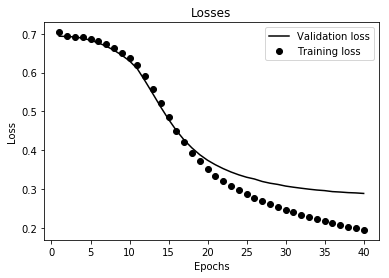

In [16]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
val_acc = history.history["val_acc"]

epochs = range(1, len(acc)+1)
plt.plot(epochs, val_loss, 'k', label='Validation loss')
plt.plot(epochs, loss, 'ko', label='Training loss')
plt.title("Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

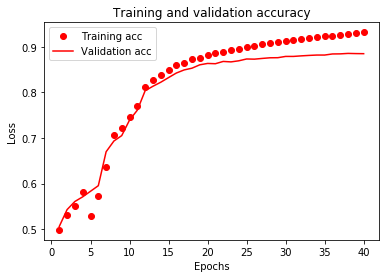

In [15]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()